In [1]:
import pandas as pd
from ktrain import text
from transformers import AutoTokenizer, AutoConfig, TFAutoModelForSequenceClassification
from transformers import pipeline
import fasttext
import nltk
import time

In [2]:
ts = text.TransformerSummarizer()
ts2 = pipeline("summarization", model="t5-large", tokenizer="t5-large", framework="tf")
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased', use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("model")
model_ft = fasttext.load_model("fasttext/model.bin")

In [3]:
def predict(text):
    return model(tokenizer.encode(text, return_tensors='tf', max_length=512))[0].numpy()[0][0]

def predict_ft(text):
    return model_ft.predict(" ".join(nltk.word_tokenize(text)))

def print_and_summarize(row):
    text = row['text']
    stars = row['stars']
    print("ORIGINAL TEXT")
    print("\n")
    print(text)
    print("\n")
    print("-------------------------------------------------------------")
    print("\n")
    print("summarizing...")
    start = time.time()
    summary = ts.summarize(text)
    print(f"done. took {time.time() - start} seconds")
    print("\n")
    print("SUMMARY")
    print("\n")
    print(summary)
    print("\n")
    print("-------------------------------------------------------------")
    print("\n")
    print("summarizing 2...")
    start = time.time()
    summary2 = ts2(text, min_length=42, clean_up_tokenization_spaces=True, max_length=1024)[0]['summary_text']
    print(f"done. took {time.time() - start} seconds")
    print("\n")
    print("SUMMARY 2")
    print("\n")
    print(summary2)
    print("\n")
    print("-------------------------------------------------------------")
    print("\n")
    print("original star", stars)
    print("\n")
    print("original pred", predict(text))
    print("summary pred", predict(summary))
    print("summary2 pred", predict(summary2))
    print("original ft pred", predict_ft(text))
    print("summary ft pred", predict_ft(summary))
    print("summary2 ft pred", predict_ft(summary2))

In [4]:
df = pd.read_csv("preds.csv", header=None, names=['idx', 'text', 'stars', 'pred'])
df.shape

(250102, 4)

In [5]:
df.head()

,idx,text,stars,pred
0,0,Really great local auto repair spot... really ...,5.0,4.891084
1,1,Best Oyster House in Toronto. Great variety a...,5.0,5.034161
2,2,We thoroughly enjoy eating here. We go here at...,5.0,4.932011
3,3,OMG!!! So good!!!! I was in AZ for work and I...,5.0,5.016096
4,4,We are here once over a year ago before we mov...,1.0,2.771281


In [6]:
df.isna().sum()

idx      0
text     0
stars    0
pred     0
dtype: int64

In [7]:
df['abs_err'] = abs(df['stars'] - df['pred'])

In [8]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


The Pleasant bar or "P-Bar" is a part of the history of Pleasant Hills.  Known now for its cleaned up family atmosphere, they pack them in on Mondays and Thursdays for "Burger Night" $1 burgers.  But the "P-Bar" has many nightly specials, and has special event nights, Karaoke, theme nights, and more.  It opens at like 5 or 6AM and serves breakfast to all of the local contractors.  Its not a gourmet restaurant but it is really good bar food, morning, noon, and night.  That said, I give it a five for being such a big part of Pleasant Hills and having the best "bar food" around.


-------------------------------------------------------------


summarizing...
done. took 29.416171073913574 seconds


SUMMARY


The "P-Bar" has many nightly specials, and has special event nights, Karaoke, theme nights, and more. It opens at like 5 or 6AM and serves breakfast to all of the local contractors. Its not a gourmet restaurant but it is really good bar food, morning, noon, and night.



In [9]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Why don't we have a True Food in Boston?

I love pretty much everything about this place....love the open, all glass feel of the restaurant itself and the simple honest cuisine

We started with juices...Now its hard to screw up a juice, but restaurants in these parts don't even offer it.....You have to go to a juice place

I really liked the humus platter with fresh veggies.  They arrive in a pail.  You feel like a rabbit, but the freshness of the veggies and humus is pretty compelling.  Ditto with the chili.  Its fresh...not outsourced or made in a central commissary and shipped

Loved the vibe, experience and especially the food


-------------------------------------------------------------


summarizing...
done. took 25.501167058944702 seconds


SUMMARY


I really liked the humus platter with fresh veggies. You feel like a rabbit, but the freshness of the veggies and humus is pretty compelling. Its fresh...not outsourced or made in a central commissary and shipped i

In [10]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Food was good but we waited an hour and 20 minutes for the food to be delivered. Granted there was 9 of us, but the place was literally empty! We were the only people in the whole place. The food came out in intervals and finally at 1 hr and 50 minutes in, the last person at our table got their pizza. The waitress didn't once ask how the food was. Didn't once ask if we needed refills on our drinks. We had to flag her down to ask for refills. Terrible service. Won't be Back!


-------------------------------------------------------------


summarizing...
done. took 23.42681384086609 seconds


SUMMARY


Food was good but we waited an hour and 20 minutes for the food to be delivered. Granted there was 9 of us, but the place was literally empty! We were the only people in the whole place. The waitress didn't once ask how the food was. We had to flag her down to ask for refills.


-------------------------------------------------------------


summarizing 2...
done. took 113

In [11]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Honey dew slush is my favorite boba drink so far, hate their milk tea, many great desserts and teas . Their crunchy pork w/rice is decent . Customer service is a little slow and not as helpful but it doesn't bother me anymore . Cute little hang out place for little kids .


-------------------------------------------------------------


summarizing...
done. took 26.494011878967285 seconds


SUMMARY


Honey dew slush is my favorite boba drink so far, hate their milk tea. Their crunchy pork w/rice is decent. Customer service is a little slow and not as helpful but it doesn't bother me anymore. Cute little hang out place for little kids.


-------------------------------------------------------------


summarizing 2...
done. took 98.03446507453918 seconds


SUMMARY 2


honey dew slush is my favorite boba drink so far, hate their milk tea, many great desserts and teas. their crunchy pork w/rice is decent. customer service is a little slow and not as helpful but it doesn't b

In [12]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


SCRUBTASTIC came to Sunrise Hospital (Las Vegas) for Nurses Week selling scrubs. No RETURN/EXCHANGE POLICY posted on-site or even on the e-mail receipt (there is no paper receipt btw!). Few days later I found out their scrubs are overly priced (like $13-$15 over) than online sellers. I purchased 6 pairs of scrubs. So I went to the store to return my purchase and they told me that the policy (which is clearly posted by the cashier at the actual store) is NO RETURN/REFUND and only EXCHANGES could be made. The "owner" FRANK K. came over to me as I was talking it out with his employees and said I was being "argumentative" and that I have to get out of the store. He then abruptly took my purchases and walked me out of the store saying he cannot help me resolve this issue and that I have to get out. There were customers around and truth is he doesn't want these customers to hear how overly priced their products are. Also, nevermind how overly priced their products are but how

In [13]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


This is one of the best restaurants ever known to man, everything is just perfectly placed and presented, and the food is just heaven sitting on a plate. I would rate 999999999999999999999999999999999 stars, but it only allows 5:(.


-------------------------------------------------------------


summarizing...
done. took 24.494232654571533 seconds


SUMMARY


This is one of the best restaurants ever known to man. Everything is just perfectly placed and presented. The food is just heaven sitting on a plate. I would rate 9999999999999.99999999999, but it only allows 5.:(. The restaurant is located in the heart of New York City.


-------------------------------------------------------------


summarizing 2...
done. took 73.70894598960876 seconds


SUMMARY 2


this is one of the best restaurants ever known to man. everything is just perfectly placed and presented, and the food is just heaven sitting on a plate. the staff are very friendly and helpful.


------------------

In [14]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Attentive and very friendly service. Best combo fajitas I have had in years. Nice decor and atmosphere. We will be back. Best Mexican food in the area. Great location with plenty of free parking in back too.


-------------------------------------------------------------


summarizing...
done. took 18.28701376914978 seconds


SUMMARY


Best combo fajitas I have had in years. Attentive and very friendly service. Nice decor and atmosphere. We will be back. Best Mexican food in the area. Great location with plenty of free parking in back too. The food was great and the service was great.


-------------------------------------------------------------


summarizing 2...
done. took 62.80456280708313 seconds


SUMMARY 2


best combo fajitas i have had in years. nice decor and atmosphere. we will be back. best Mexican food in the area. great location with plenty of free parking in back too.


-------------------------------------------------------------


original star 4.0


o

In [15]:
df['abs_err'].describe()

count    2.501020e+05
mean     3.261485e-01
std      3.787700e-01
min      2.384186e-07
25%      6.994942e-02
50%      1.591508e-01
75%      4.884317e-01
max      4.111990e+00
Name: abs_err, dtype: float64

In [16]:
top_losses = df[df['abs_err'] > 0.48]
top_losses.shape

(63657, 5)

In [17]:
len(top_losses) / len(df)

0.2545241541451088

In [18]:
top_losses['stars'].value_counts().sort_values(ascending=False)

4.0    24201
3.0    12390
5.0    10748
2.0     8691
1.0     7627
Name: stars, dtype: int64

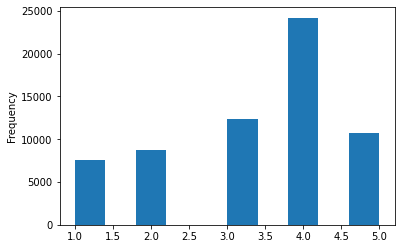

In [19]:
top_losses['stars'].plot.hist();

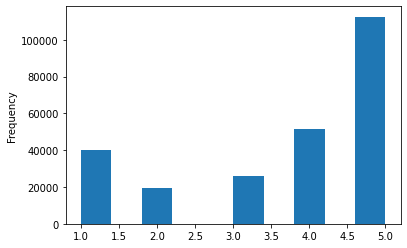

In [20]:
df['stars'].plot.hist();

In [21]:
top_losses.sort_values('abs_err').head(10)

,idx,text,stars,pred,abs_err
162196,162196,This is my second time (and last time) here. I...,1.0,1.480003,0.480003
98158,98158,Pho tai gan. the soup broth was yummy. rmeind...,4.0,3.519995,0.480005
128396,128396,I defended the Buffet @ Bellagio even when my ...,1.0,1.480011,0.480011
181881,181881,Located in San Marco Square in the Venetian - ...,4.0,4.480015,0.480015
76984,76984,"If I weren't already at Wynn, I wouldn't eat a...",3.0,3.480042,0.480042
144802,144802,Our visit started a bit rocky but once the roa...,4.0,4.480050,0.480050
42272,42272,I don't visit bars often but Dodey's is certai...,5.0,4.519950,0.480050
12162,12162,"Fantastic Mexican food, servers are good about...",5.0,4.519940,0.480060
160388,160388,I actually feel bad for them... :(\nI went the...,1.0,1.480072,0.480072
233261,233261,Spent my afternoon there this hot day in Phoen...,5.0,4.519926,0.480074


In [22]:
top_losses = df[df['abs_err'] > 1]
top_losses.shape

(13685, 5)

In [23]:
len(top_losses) / len(df)

0.05471767518852308

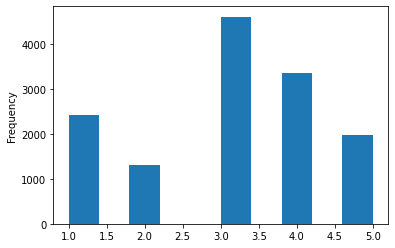

In [24]:
top_losses['stars'].plot.hist();

In [25]:
top_losses.sort_values('abs_err').head(10)

,idx,text,stars,pred,abs_err
216256,216256,"Pros: Great meat department, underground parki...",1.0,2.000016,1.000016
109025,109025,Thanks to all the Cats that reviewed this spot...,4.0,5.000041,1.000041
28498,28498,"Hidden spot, chic atmosphere, modern and fun ....",4.0,5.000047,1.000047
95731,95731,Always have a great time at Fix! Friendly sta...,4.0,5.000047,1.000047
32314,32314,I stop at this location often whenever in Phoe...,3.0,1.999944,1.000056
153994,153994,Not a fan of their fries. Burger was okay. I g...,4.0,2.999937,1.000063
52939,52939,This place needs two listings!!! The coffee he...,3.0,1.999933,1.000067
176526,176526,One of the best bar and grill in town! You can...,4.0,5.000104,1.000104
217094,217094,"The food rates a 3 star, but for lunch and wit...",3.0,4.000111,1.000111
116501,116501,Excellent find. Great pub like atmosphere tuck...,4.0,5.000143,1.000143


In [26]:
top_losses = df[df['abs_err'] > 1.5]
top_losses.shape

(3631, 5)

In [27]:
len(top_losses) / len(df)

0.014518076624737107

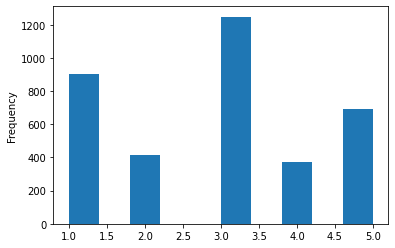

In [28]:
top_losses['stars'].plot.hist();

In [29]:
top_losses.sort_values('abs_err').head(10)

,idx,text,stars,pred,abs_err
164186,164186,"If you want some authentic Chinese food, this ...",3.0,4.500262,1.500262
236124,236124,Yelp usually helps me find new places to try i...,2.0,3.500432,1.500432
248347,248347,I was a little disappointed that the app gives...,4.0,2.499429,1.500571
91282,91282,Came here for a business dinner with a group. ...,3.0,4.500625,1.500625
204766,204766,"I've been here a few times before, and have ra...",4.0,2.499327,1.500673
32127,32127,"Food is great, however it doesn't matter what ...",1.0,2.500680,1.500680
130801,130801,This place is CRAZY expensive to ride the trai...,1.0,2.500717,1.500717
107674,107674,The wings are good but the burgers need improv...,4.0,2.498920,1.501080
56347,56347,Any night that includes Chronic Tacos is sure ...,3.0,1.498629,1.501371
154850,154850,"Super hot, water is really warm, you can't tak...",1.0,2.501575,1.501575


In [37]:
print_and_summarize(df.iloc[164186])

ORIGINAL TEXT


If you want some authentic Chinese food, this is the place to go!  Service was fast and the food was good and cheap!

Items ordered:

Beef Ramen - Don't expect Japanese Raman or anything near that.  The broth in this soup taste like beef stew and its yummy.  Very tasty and yummy.

Salt and Pepper Chicken Wings - Nom Nom Nom.... I love the chicken wings here.  Fried to perfection and the wings were season to perfection too.

Shrimp Won-Ton Soup with Udon - This noodle soup was a little bland, but that is how these kind of noodle soup is supposed to be.  

Will recommend this place to anyone who want some authentic Chinese food.


-------------------------------------------------------------


summarizing...
done. took 29.815680980682373 seconds


SUMMARY


Beef Ramen - Don't expect Japanese Raman or anything near that. Salt and Pepper Chicken Wings - Fried to perfection and the wings were season to perfection too. Shrimp Won-Ton Soup with Udon - This noodle soup was a li

In [31]:
print_and_summarize(df.iloc[25782])

ORIGINAL TEXT


I've been there twice now. First time was just for the frozen hot chocolate. I was expecting more when I tasted it. It was good, but I don't see what was so special about it. I went again recently and decided to try the Deep Fried Oreos. DAMN, this is one of the best desserts i've ever had. The Oreos were covered in a perfect batter, and the oreo's inside were warm and soft. This combo mixed with the cold oreo ice cream is a perfect match. I'd go to this place just for the deep fried oreos.


-------------------------------------------------------------


summarizing...
done. took 23.992511987686157 seconds


SUMMARY


DAMN, this is one of the best desserts i've ever had. The Oreos were covered in a perfect batter, and the oreo's inside were warm and soft. This combo mixed with the cold oreo ice cream is a perfect match. I'd go to this place just for the deep fried oreos.


-------------------------------------------------------------


summarizing 2...
done. took 85.36

In [32]:
print_and_summarize(df.iloc[31287])

ORIGINAL TEXT


The male Barista making coffees has to be the slowest Starbucks person I have ever seen in my life. It looks like he is in his kitchen at home leisurely making breakfast for himself on a lazy Sunday morning.


-------------------------------------------------------------


summarizing...
done. took 20.50663185119629 seconds


SUMMARY


The male Barista making coffees has to be the slowest Starbucks person I have ever seen in my life. It looks like he is in his kitchen at home leisurely making breakfast for himself on a lazy Sunday morning. He has to have been making a cup of coffee for himself at home.


-------------------------------------------------------------


summarizing 2...
done. took 67.48023390769958 seconds


SUMMARY 2


the male barista making coffees has to be the slowest Starbucks person i have ever seen in my life. it looks like he is in his kitchen at home leisurely making breakfast for himself on a lazy Sunday morning.


------------------------------

In [33]:
print_and_summarize(df.iloc[27611])

ORIGINAL TEXT


Their customer service is great just the quality of the haircut I wanted was mediocre. Would not recommend.


-------------------------------------------------------------


summarizing...
done. took 18.974292993545532 seconds


SUMMARY


The quality of the haircut I wanted was mediocre. Would not recommend. Their customer service is great just the quality of their haircut was mediocre, I would not recommend them to anyone. They are a great place to get a haircut, but the quality is mediocre at best, I wouldn't recommend them.


-------------------------------------------------------------


summarizing 2...
done. took 70.46777486801147 seconds


SUMMARY 2


the quality of the haircut i wanted was mediocre. their customer service is great. the price was a little steep for what you get. if you want a cut that lasts, it's not worth it.


-------------------------------------------------------------


original star 3.0


original pred 1.4965283
summary pred 1.5509105
summa

In [34]:
top_top_losses = top_losses[top_losses['abs_err'] > 2]

In [35]:
top_top_losses.shape

(1138, 5)

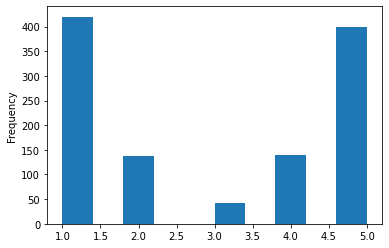

In [36]:
top_top_losses['stars'].plot.hist();

In [38]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


Dear Costco, may I please get a schedule of your samples times? This location has really been slacking on the week days and forcing me to go home and cook for my kids. Problem is.. I can't cook ‍


-------------------------------------------------------------


summarizing...
done. took 29.91914701461792 seconds


SUMMARY


Costco has been slacking on the week days and forcing me to go home and cook for my kids. Problem is.. I can't cook ‘‘Dear Costco, may I please get a schedule of your samples times?’ ‘This location has really been slacker.’


-------------------------------------------------------------


summarizing 2...
done. took 99.72744703292847 seconds


SUMMARY 2


costco has really been slacking on the week days and forcing me to go home and cook for my kids. i can't cook. costco may i please get a schedule of your samples times?


-------------------------------------------------------------


original star 5.0


original pred 1.265027
summary pred 1.4343383

In [39]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


No way Jose! Loved the teeny $12 salt air margarita (really did) and was digging the camarones with black garlic but truth be told, I can get REAL street tacos and AUTHENTIC Chinese food which is MUCH better and about 1/4 of the price.


-------------------------------------------------------------


summarizing...
done. took 20.7531099319458 seconds


SUMMARY


Loved the teeny $12 salt air margarita (really did) and was digging the camarones with black garlic but truth be told, I can get REAL street tacos and AUTHENTIC Chinese food which is MUCH better and about 1/4 of the price. No way Jose!


-------------------------------------------------------------


summarizing 2...
done. took 95.28222608566284 seconds


SUMMARY 2


no way jose! loved the teeny $12 salt air margarita (really did) and was digging the camarones with black garlic but truth be told, i can get REAL street tacos and AUTHENTIC Chinese food which is much better and about 1/4 of the price.


-----------

In [40]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


Great customer service...and I didn't even buy anything from this location.
Called about bamboo for my child's Beta Fish vase and although they didn't have any... they directed me to the appropriate shop. 
They could of just said "We don't have any" and hung up.
If they took the time to help me...hense I will take the time to say "thanks....for taking the time to make a child happy by helping."

I will be certain to purchase any flower orders in the future from this business and promote the business with friends and family.


-------------------------------------------------------------


summarizing...
done. took 24.903138160705566 seconds


SUMMARY


Called about bamboo for my child's Beta Fish vase and although they didn't have any... they directed me to the appropriate shop. Great customer service...and I didn't even buy anything from this location. I will be certain to purchase any flower orders in the future from this business.


----------------------------------

In [41]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


I heard this place Closed, I wanted to try it, can some one tell me so....


-------------------------------------------------------------


summarizing...
done. took 23.659041166305542 seconds


SUMMARY


"I heard this place Closed, I wanted to try it, can some one tell me so" "I wanted to go to this place, I heard it was closed" "It's not closed, it's just closed." "I heard it's closed, I want to go there" "Can some one tells me so?"


-------------------------------------------------------------


summarizing 2...
done. took 64.28693103790283 seconds


SUMMARY 2


i heard this place Closed, i wanted to try it, can some one tell me so..... if it's closed, it'll be the last time i eat there.


-------------------------------------------------------------


original star 5.0


original pred 2.896124
summary pred 2.0493095
summary2 pred 2.0315325
original ft pred (('__label__NEGATIVE',), array([0.50826418]))
summary ft pred (('__label__NEGATIVE',), array([0.98545659]))
s

In [42]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


I guess a part of making a nightclub popular is to be an a$$hole. For this they deserve 6 stars. The place was pretty meh, though admittedly I am not a club going person anymore, there was once a time that I was and I would not have been impressed then either. As expected, the drinks were overpriced, the entry was annoying, and the wait to go inside was too long. But I guess that's part of the "charm." What probably annoyed me the most was that we were in the balcony section and they closed it down, most likely because Cash Cash (the name of the DJ's on that night) sucks and they couldn't get enough people in this craphole to keep the balcony open. The house DJ mixed some good jams and I was sad to have them leave and be exposed to Cash Cash. EDM is not my jam but crappy music is crappy music. And as mentioned previously, shout out to the a$$hole security at this place, you da real POS. Also, I am always surprised to see how much people are willing to pay for bottle ser

In [43]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


Ok, I am awful at checking yelp notifications and missed the owner's truly legitimate response, very shortly after my post, to my frustration.   I certainly get that the circumstances were not usual, and take back my one star, or at least hope to balance it with a good update.  If I need a salon or spa on a Sunday again, I'll gladly give this one another  chance.


-------------------------------------------------------------


summarizing...
done. took 20.934199810028076 seconds


SUMMARY


"I certainly get that the circumstances were not usual, and take back my one star, or at least hope to balance it with a good update," says the reviewer. "If I need a salon or spa on a Sunday again, I'll gladly give this one another chance," she adds.


-------------------------------------------------------------


summarizing 2...
done. took 95.47477984428406 seconds


SUMMARY 2


if i need a salon or spa on a Sunday again, i'll gladly give this one another chance. the owner's res

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
sample = df.sample(1000, random_state=42)

In [47]:
def get_summaries(text):
    summary1 = ts.summarize(text)
    summary2 = ts2(text, min_length=42, clean_up_tokenization_spaces=True, max_length=1024)[0]['summary_text']
    return summary1, summary2

In [49]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [50]:
sample['summary1'], sample['summary2'] = sample['text'].progress_apply(get_summaries)

KeyboardInterrupt: 